In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Data/Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [3]:
# let's define what columns we are going to work with
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

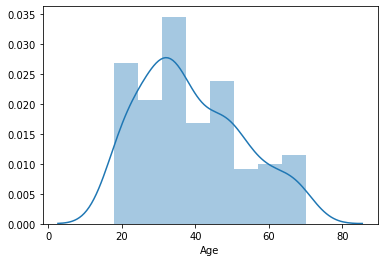

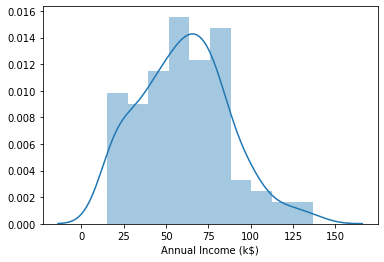

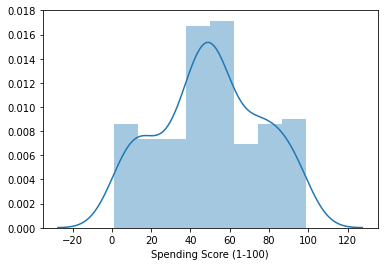

In [4]:
for i in columns:
    plt.figure()
    sns.distplot(data[i])

### Distribution Over Gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

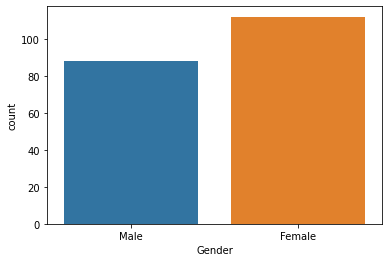

In [5]:
sns.countplot(x='Gender', data=data)

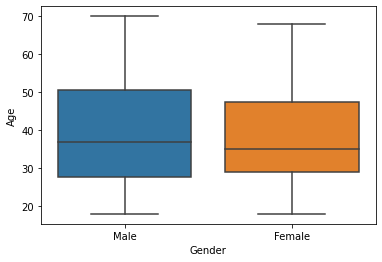

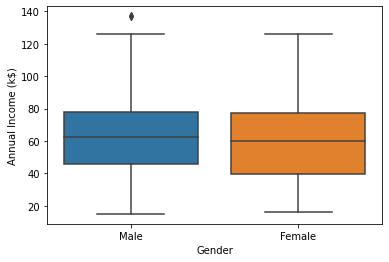

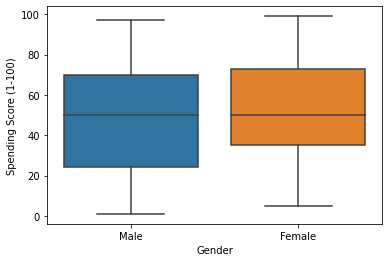

In [6]:
for i in columns:
    plt.figure()
    sns.boxplot(data=data, x='Gender', y=data[i])

# Bivariate Analysis

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

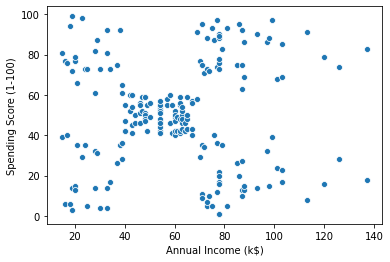

In [7]:
sns.scatterplot(data=data, x=columns[1], y=columns[2])

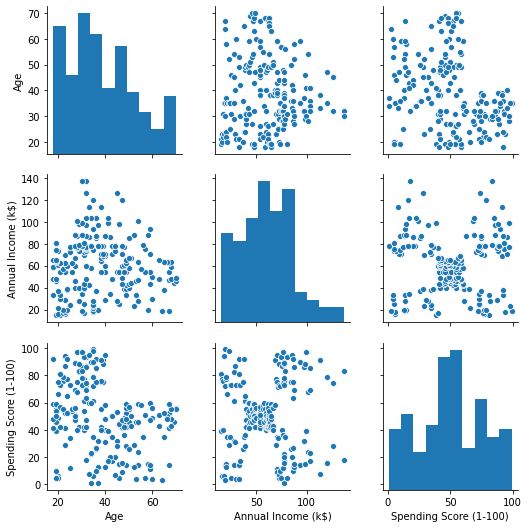

In [8]:
sns.pairplot(data=data[columns])

### Variables Correlation  

In [9]:
data[columns].corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<AxesSubplot:>

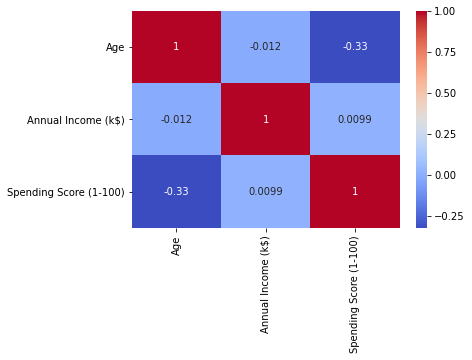

In [10]:
sns.heatmap(data[columns].corr(), annot=True, cmap='coolwarm')

## Clustering

### Clustering on Annual Income

#### Let's find the best number of clusters using Elbow Method

In [11]:
intertias = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data[['Annual Income (k$)']])
    intertias.append(kmeans.inertia_)

In [12]:
intertias

[137277.2800000002,
 48660.88888888887,
 23528.152173913048,
 13278.112713472474,
 8481.49619047619,
 5050.904761904766,
 3941.41636141636,
 2822.4996947496957,
 2189.2563714063713]

### Let's plot the Elbow values (intertias) to select the best number of clusters

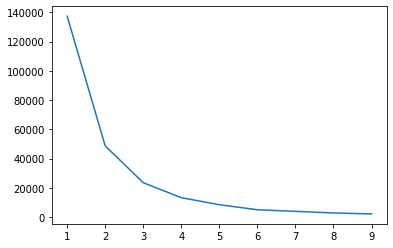

In [13]:
plt.plot(range(1, 10), intertias)

#### The Elbow happens to be on 5 

![elbow_results](Data/elbow.PNG)

### Clustering Based on Annual Income Score

In [14]:
kmeans_income_model = KMeans(n_clusters=5)
kmeans_income_model.fit(data[['Annual Income (k$)']])
data['Income Segment'] = kmeans_income_model.labels_

### Income Segment Distribution

<AxesSubplot:xlabel='Income Segment', ylabel='count'>

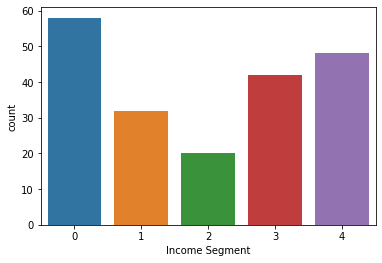

In [15]:
sns.countplot(x='Income Segment', data=data)

### Clustering on Annual Income & Spending Score

In [16]:
kmeans_income_spending_model = KMeans(n_clusters=5)
kmeans_income_spending_model.fit(data[['Annual Income (k$)', 'Spending Score (1-100)']])
data['Income & Spending Segment'] = kmeans_income_spending_model.labels_

### Income & Spending Segment Distribution

<AxesSubplot:xlabel='Income & Spending Segment', ylabel='count'>

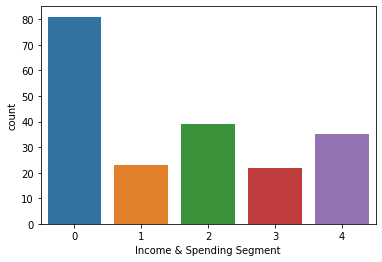

In [17]:
sns.countplot(x='Income & Spending Segment', data=data)

## Clusters (Segments) Visualization

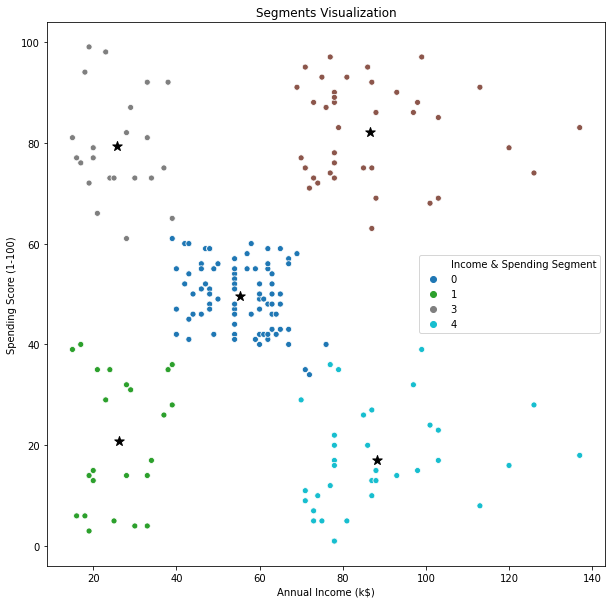

In [18]:
centroids = pd.DataFrame(kmeans_income_spending_model.cluster_centers_)
centroids.columns = ['x', 'y']

plt.figure(figsize=(10,10))
plt.scatter(x=centroids['x'], y=centroids['y'], s=100, c='black', marker='*')

# title
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Income & Spending Segment', palette='tab10')
plt.title('Segments Visualization')
plt.savefig('customers_segmentation.png')

In [19]:
pd.crosstab(data['Income & Spending Segment'], data['Gender'], normalize='index')

Gender,Female,Male
Income & Spending Segment,,
0,0.592593,0.407407
1,0.608696,0.391304
2,0.538462,0.461538
3,0.590909,0.409091
4,0.457143,0.542857


#### Gender distribution between clusters seems fairly distributed

In [20]:
data.groupby('Income & Spending Segment')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income & Spending Segment,,,
0,42.716049,55.296296,49.518519
1,45.217391,26.304348,20.913043
2,32.692308,86.538462,82.128205
3,25.272727,25.727273,79.363636
4,41.114286,88.200000,17.114286


#### An interesting insight we get by comparing cluster 3 and 4, where the former has young adults with low income and high spending, whereas the latter is the opposit.